In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

In [11]:
DATA_DAY_1 = "../data/round-4-island-data-bottle/prices_round_4_day_1.csv"
DATA_DAY_2 = "../data/round-4-island-data-bottle/prices_round_4_day_2.csv"
DATA_DAY_3 = "../data/round-4-island-data-bottle/prices_round_4_day_3.csv"

OBS_DATA_DAY_1 = "../data/round-4-island-data-bottle/observations_round_4_day_1.csv"
OBS_DATA_DAY_2 = "../data/round-4-island-data-bottle/observations_round_4_day_2.csv"
OBS_DATA_DAY_3 = "../data/round-4-island-data-bottle/observations_round_4_day_3.csv"

TRADE_DATA_DAY_1 = "../data/round-4-island-data-bottle/trades_round_4_day_1.csv"
TRADE_DATA_DAY_2 = "../data/round-4-island-data-bottle/trades_round_4_day_2.csv"
TRADE_DATA_DAY_3 = "../data/round-4-island-data-bottle/trades_round_4_day_3.csv"

df0 = pd.read_csv(DATA_DAY_1, sep=';')
df1 = pd.read_csv(DATA_DAY_2, sep=';')
df2 =  pd.read_csv(DATA_DAY_3, sep=';')

odf0 = pd.read_csv(OBS_DATA_DAY_1, sep=',')
odf1 = pd.read_csv(OBS_DATA_DAY_2, sep=',')
odf2 = pd.read_csv(OBS_DATA_DAY_3, sep=',')

# Adjust timestamps for odf1 and odf2
odf1['timestamp'] += 1000000  # Start after odf0 ends
odf2['timestamp'] += 2000000  # Start after odf1 ends

tdf0 = pd.read_csv( TRADE_DATA_DAY_1, sep=';')
tdf1 = pd.read_csv( TRADE_DATA_DAY_2, sep=';')
tdf2 =  pd.read_csv(TRADE_DATA_DAY_3, sep=';')

df = pd.concat([df0, df1, df2])
df.set_index(['day', 'timestamp', 'product'], inplace=True)

odf = pd.concat([odf0, odf1, odf2])
odf.set_index(["timestamp"], inplace=True)

tdf = pd.concat([tdf0, tdf1, tdf2])
tdf.set_index(['timestamp', 'symbol'], inplace=True)

In [12]:
odf[9995: 10020]

,bidPrice,askPrice,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex
timestamp,,,,,,,
999500,661.0,662.5,1.4,10.5,-4.0,209.926279,64.94
999600,659.5,661.0,1.4,10.5,-4.0,209.565005,64.96
999700,658.5,660.0,1.4,10.5,-4.0,209.504858,64.98
999800,658.0,659.5,1.4,10.5,-4.0,209.482890,65.00
999900,658.0,659.5,1.4,10.5,-4.0,209.479800,65.02
1000000,657.0,658.5,1.4,10.5,-4.0,209.000000,65.00
1000100,660.5,662.0,1.4,10.5,-4.0,209.299299,65.00
1000200,664.0,665.5,1.4,10.5,-4.0,209.467113,65.00
1000300,669.0,670.5,1.4,10.5,-4.0,209.525592,65.00


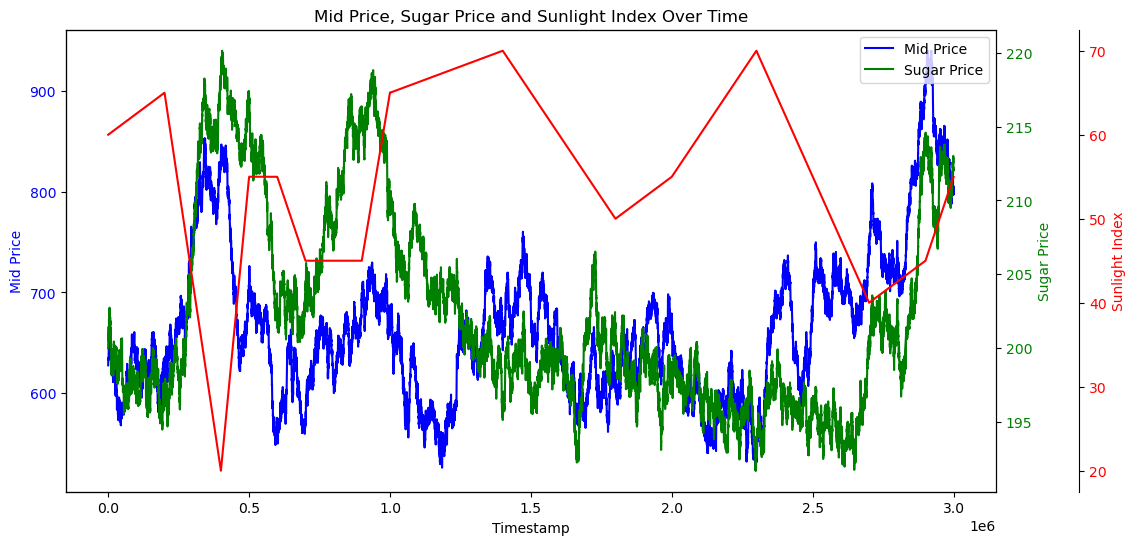

In [14]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot mid price on primary y-axis
ax1.plot(odf.index, (odf['bidPrice'] + odf['askPrice'])/2, label='Mid Price', color='blue')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Mid Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary y-axis for sugar price
ax2 = ax1.twinx()
ax2.plot(odf.index, odf['sugarPrice'], label='Sugar Price', color='green')
ax2.set_ylabel('Sugar Price', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Create third y-axis for sunlight index
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis
ax3.plot(odf.index, odf['sunlightIndex'], label='Sunlight Index', color='red')
ax3.set_ylabel('Sunlight Index', color='red')
ax3.tick_params(axis='y', labelcolor='red')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title('Mid Price, Sugar Price and Sunlight Index Over Time')
plt.show()

In [20]:
tdf

buyer  seller   currency    price  \
timestamp symbol                                                           
0         RAINFOREST_RESIN               NaN     NaN  SEASHELLS  10008.0   
100       KELP                           NaN     NaN  SEASHELLS   2034.0   
          RAINFOREST_RESIN               NaN     NaN  SEASHELLS   9992.0   
          SQUID_INK                      NaN     NaN  SEASHELLS   1838.0   
200       JAMS                           NaN     NaN  SEASHELLS   6542.0   
...                                      ...     ...        ...      ...   
999800    VOLCANIC_ROCK_VOUCHER_10500    NaN     NaN  SEASHELLS      0.0   
          VOLCANIC_ROCK_VOUCHER_9500     NaN     NaN  SEASHELLS    419.0   
          VOLCANIC_ROCK_VOUCHER_9500     NaN     NaN  SEASHELLS    419.0   
          VOLCANIC_ROCK_VOUCHER_9750     NaN     NaN  SEASHELLS    184.0   
          VOLCANIC_ROCK_VOUCHER_9750     NaN     NaN  SEASHELLS    184.0   

                                       quantity  
timestamp symbol                                 
0         RAINFOREST_RESIN                    6  
100       KELP                                1  
          RAINFOREST_RESIN                    2  
          SQUID_INK                           1  
200       JAMS                               11  
...                                         ...  
999800    VOLCANIC_ROCK_VOUCHER_10500         1  
          VOLCANIC_ROCK_VOUCHER_9500         13  
          VOLCANIC_ROCK_VOUCHER_9500          1  
          VOLCANIC_ROCK_VOUCHER_9750         13  
          VOLCANIC_ROCK_VOUCHER_9750          1  

[54490 rows x 5 columns]

In [19]:
log = pd.read_csv('../data/logs/0f9df3ec-34f7-4a3c-a63b-0569d2494282.csv', delimiter=';')
log[log['product'] == 'MAGNIFICENT_MACARONS'].head(25)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
6,3,0,MAGNIFICENT_MACARONS,667.0,16.0,665.0,15.0,658.0,26.0,676,8,685.0,26.0,692.0,15.0,671.5,0.0
20,3,100,MAGNIFICENT_MACARONS,668.0,20.0,666.0,18.0,659.0,25.0,677,10,686.0,25.0,693.0,18.0,672.5,3946.0
42,3,200,MAGNIFICENT_MACARONS,665.0,10.0,662.0,15.0,656.0,21.0,670,6,674.0,5.0,683.0,21.0,667.5,10615.0
52,3,300,MAGNIFICENT_MACARONS,665.0,12.0,662.0,13.0,656.0,26.0,674,6,683.0,26.0,689.0,13.0,669.5,10574.0
60,3,400,MAGNIFICENT_MACARONS,664.0,20.0,662.0,18.0,655.0,28.0,673,10,682.0,28.0,689.0,18.0,668.5,11868.0
89,3,500,MAGNIFICENT_MACARONS,665.0,10.0,662.0,19.0,656.0,25.0,674,5,683.0,25.0,689.0,19.0,669.5,18457.0
95,3,600,MAGNIFICENT_MACARONS,665.0,20.0,662.0,19.0,656.0,29.0,674,10,683.0,29.0,689.0,19.0,669.5,18416.0
106,3,700,MAGNIFICENT_MACARONS,667.0,9.0,663.0,12.0,660.0,11.0,672,6,681.0,20.0,687.0,11.0,669.5,25045.0
127,3,800,MAGNIFICENT_MACARONS,662.0,16.0,659.0,16.0,653.0,22.0,671,8,680.0,22.0,686.0,16.0,666.5,24387.0
139,3,900,MAGNIFICENT_MACARONS,663.0,14.0,661.0,11.0,654.0,29.0,672,7,681.0,29.0,688.0,11.0,667.5,28303.0
